In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style="whitegrid", palette="muted", color_codes=True)

In [3]:
!ls

1M.windows.bed               racon.round3.vcf
1M.windows.dv.cov.bed        regions.bed
1M.windows.rc.cov.bed        run_bedtools.sh
1M.windows.rm.cov.bed        sv_small_no_rDNA.vcf
plots.ipynb                  t2t-chm13.20200904.fasta.fai
racon.round3.merfin.vcf


In [79]:
df_dv = pd.read_csv("1M.windows.dv.cov.bed", sep="\t", names=["chrom", "start", "end", "cov", "x", "y", "z"])
df_dv["Polisher"] = "DeepVariant"

df_rc = pd.read_csv("1M.windows.rc.cov.bed", sep="\t", names=["chrom", "start", "end", "cov", "x", "y", "z"])
df_rc["Polisher"] = "Racon"

df_rm = pd.read_csv("1M.windows.rm.cov.bed", sep="\t", names=["chrom", "start", "end", "cov", "x", "y", "z"])
df_rm["Polisher"] = "Racon-Merfin"

df = pd.concat([df_dv, df_rc, df_rm])

# Plotting the Distribution
First, we will plot the distribution of the number of polishing edits in 1 Mbp windows.

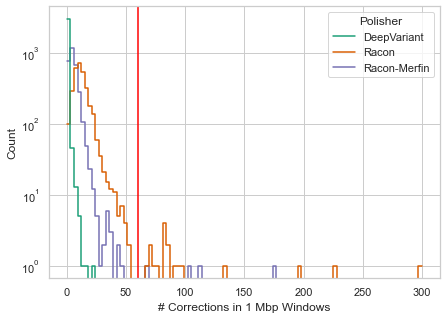

In [112]:
# color pallete: https://colorbrewer2.org/?type=qualitative&scheme=Dark2&n=3
fig, ax = plt.subplots(figsize=(7, 5))
sns.histplot(data=df,
             x="cov",
             hue="Polisher",
             bins=100,
             ax=ax,
             element="step",
             fill=False,
             palette=["#1b9e77", "#d95f02", "#7570b3"]
            )
plt.yscale('log')
plt.xlabel("# Corrections in 1 Mbp Windows")
plt.axvline(60, color="red")
plt.savefig("polishing_edit_hist.pdf")
plt.show()